### Setup and Library Installation:

In [1]:
!pip install pycryptodome pillow matplotlib

In [2]:
from Crypto.Cipher import DES
from Crypto.Random import get_random_bytes
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Preparing the Image Data:

In [3]:
def pad_data(data):
    while len(data) % 8 != 0:
        data += b' '
    return data

In [4]:
def image_to_bytes(image_path):
    image = Image.open(image_path).convert("L")  # grayscale for simplicity
    data = np.array(image).tobytes()
    return image, pad_data(data)

### Encryption: 

In [5]:
def encrypt_image(data, key):
    cipher = DES.new(key, DES.MODE_ECB)
    encrypted_data = cipher.encrypt(data)
    return encrypted_data

In [6]:
key = get_random_bytes(8) 

### Decryption: 

In [7]:
def decrypt_image(encrypted_data, key):
    cipher = DES.new(key, DES.MODE_ECB)
    decrypted_data = cipher.decrypt(encrypted_data)
    return decrypted_data

In [8]:
def bytes_to_image(byte_data, shape):
    array = np.frombuffer(byte_data, dtype=np.uint8)
    array = array[:shape[0]*shape[1]]  # Trim padding
    return Image.fromarray(array.reshape(shape))

### Full Pipeline and Testing:

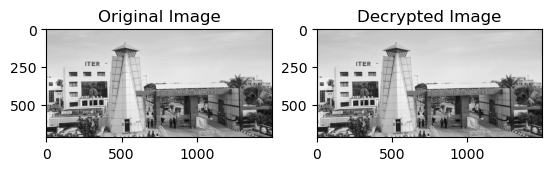

In [10]:
# Load and convert image
original_image, byte_data = image_to_bytes("iter.jpg")
shape = original_image.size[::-1]  # height, width

# Encrypt
encrypted_data = encrypt_image(byte_data, key)

# Decrypt
decrypted_data = decrypt_image(encrypted_data, key)

# Reconstruct image
decrypted_image = bytes_to_image(decrypted_data, shape)

# Display images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Decrypted Image")
plt.imshow(decrypted_image, cmap='gray')
plt.show()

### Pixel-wise Comparison:

In [12]:
# Convert images to same size and mode
original_array = np.array(original_image)
decrypted_array = np.array(decrypted_image)

# Exact match check
if np.array_equal(original_array, decrypted_array):
    print("✅ Pixel Match: Decrypted image matches the original exactly.")
else:
    print("❌ Pixel Mismatch: Decrypted image differs from the original.")

✅ Pixel Match: Decrypted image matches the original exactly.


### Tolerant Comparison using Mean Squared Error (MSE):

In [14]:
def mean_squared_error(img1, img2):
    return np.mean((img1.astype("float") - img2.astype("float")) ** 2)

mse = mean_squared_error(original_array, decrypted_array)
print(f"📊 Mean Squared Error (MSE): {mse:.4f}")

if mse < 1e-3:
    print("✅ Integrity check passed: Images are visually identical.")
else:
    print("⚠️ Integrity check warning: Images differ visually.")

📊 Mean Squared Error (MSE): 0.0000
✅ Integrity check passed: Images are visually identical.


### Hash-Based Comparison:

In [16]:
import hashlib

def image_hash(image):
    return hashlib.sha256(image.tobytes()).hexdigest()

original_hash = image_hash(original_array)
decrypted_hash = image_hash(decrypted_array)

print(f"Original Hash : {original_hash}")
print(f"Decrypted Hash: {decrypted_hash}")

if original_hash == decrypted_hash:
    print("✅ Hash Match: Data integrity confirmed.")
else:
    print("❌ Hash Mismatch: Data integrity compromised.")

Original Hash : 59d86e99b799469af112bd69f8fd0f2463ec10adacfc18668052cc0c2b2d46df
Decrypted Hash: 59d86e99b799469af112bd69f8fd0f2463ec10adacfc18668052cc0c2b2d46df
✅ Hash Match: Data integrity confirmed.
